# Task
Train and evaluate a polynomial regression model to predict taxi trip pricing from the "taxi_trip_pricing.csv" dataset, comparing its performance against a linear regression baseline.

## **Import Libraries**

### **Subtask:**
Import necessary libraries such as pandas, numpy, matplotlib, seaborn, sklearn for data manipulation, visualization, and model building.



Import the specified libraries: numpy, matplotlib.pyplot, seaborn, and specific modules from sklearn for data manipulation, visualization, and model building. Pandas is already imported.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## **Understand the Data**

Perform initial data exploration, including checking data types, missing values, descriptive statistics, and unique values for categorical columns.


To begin understanding the data, I will display the first few rows, check data types, identify missing values, and generate descriptive statistics for numerical columns. These steps provide a comprehensive overview of the dataset's structure and content.



In [2]:
import pandas as pd

df = pd.read_csv("taxi_trip_pricing.csv")


Based on the previous output, the next logical step is to identify categorical columns and then display their unique values and counts to complete the data exploration as per the subtask instructions. Categorical columns include 'Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', and 'Weather'.



In [3]:
df.head()


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [9]:
df.isnull().sum()


Trip_Distance_km          0
Time_of_Day              50
Day_of_Week              50
Passenger_Count           0
Traffic_Conditions       50
Weather                  50
Base_Fare                 0
Per_Km_Rate               0
Per_Minute_Rate           0
Trip_Duration_Minutes     0
Trip_Price                0
dtype: int64

In [8]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [6]:
df.describe()


,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [7]:
df.shape


(1000, 11)

## **Visualize the Data**

Create various plots to understand the distribution of features, identify relationships between variables, and visualize the target variable. Ensure all plots have legends.


The first instruction is to plot the distribution of the target variable 'Trip_Price' using a histogram from `seaborn`.



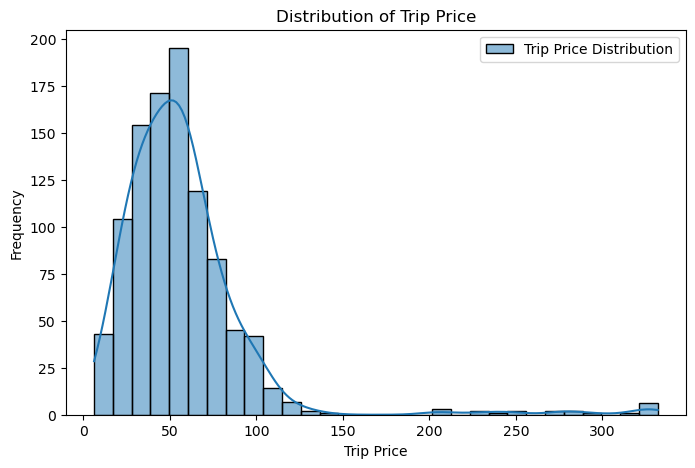

In [10]:
# Drop missing values for the target variable
trip_price = df['Trip_Price'].dropna()

plt.figure(figsize=(8, 5))
sns.histplot(trip_price, bins=30, kde=True, label='Trip Price Distribution')

plt.xlabel('Trip Price')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Price')
plt.legend()
plt.show()

The next step is to create scatter plots to visualize the relationship between key numerical features ('Trip_Distance_km' and 'Trip_Duration_Minutes') and the 'Trip_Price'.



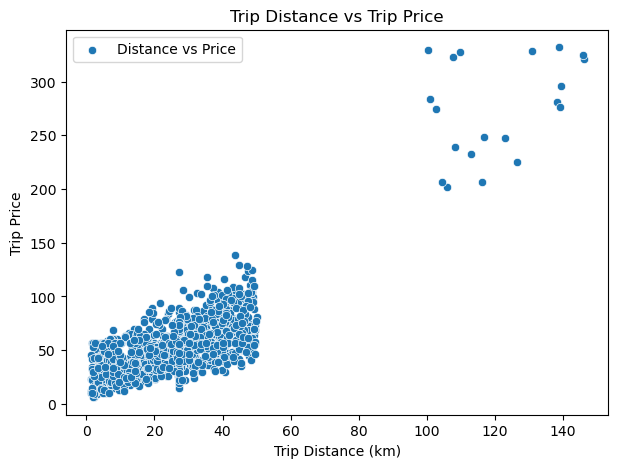

In [12]:
# Drop rows with missing values for plotting
distance_price_df = df[['Trip_Distance_km', 'Trip_Price']].dropna()

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=distance_price_df,
    x='Trip_Distance_km',
    y='Trip_Price',
    label='Distance vs Price'
)

plt.xlabel('Trip Distance (km)')
plt.ylabel('Trip Price')
plt.title('Trip Distance vs Trip Price')
plt.legend()
plt.show()





The next step is to generate box plots to visualize the relationship between each categorical feature ('Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather') and the target variable 'Trip_Price'.



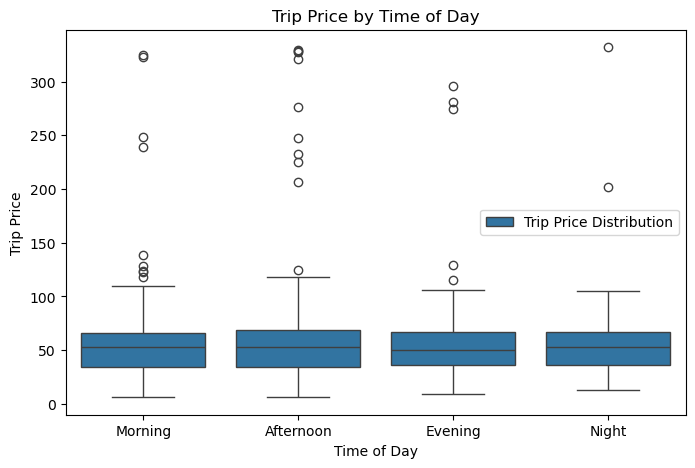

In [14]:
df_cat = df.dropna(subset=['Trip_Price'])

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_cat,
    x='Time_of_Day',
    y='Trip_Price'
)

plt.title('Trip Price by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Trip Price')
plt.legend(['Trip Price Distribution'])
plt.show()

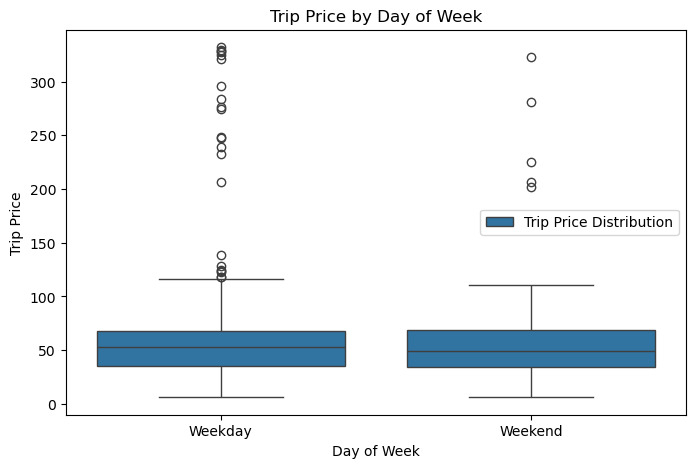

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_cat,
    x='Day_of_Week',
    y='Trip_Price'
)

plt.title('Trip Price by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Trip Price')
plt.legend(['Trip Price Distribution'])
plt.show()

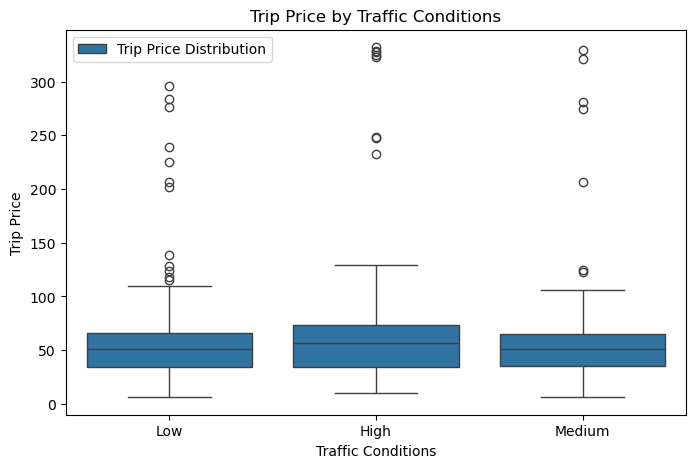

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_cat,
    x='Traffic_Conditions',
    y='Trip_Price'
)

plt.title('Trip Price by Traffic Conditions')
plt.xlabel('Traffic Conditions')
plt.ylabel('Trip Price')
plt.legend(['Trip Price Distribution'])
plt.show()


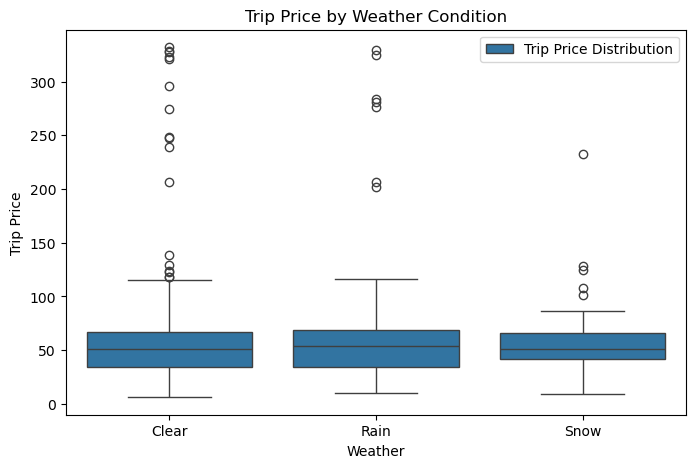

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_cat,
    x='Weather',
    y='Trip_Price'
)

plt.title('Trip Price by Weather Condition')
plt.xlabel('Weather')
plt.ylabel('Trip Price')
plt.legend(['Trip Price Distribution'])
plt.show()


## **Prepare Features (X & y)**

Separate the dataset into features (X) and the target variable (y). Handle categorical features using one-hot encoding, and split the data into training and testing sets.


The first step in preparing the features is to handle missing values in the DataFrame. We will impute numerical columns with their median, categorical columns with their mode, and the target variable 'Trip_Price' with its median, as per the instructions.



In [19]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns


Following the imputation of missing values, I will now separate the features (X) and the target variable (y), apply one-hot encoding to the categorical features in X, and then split the data into training and testing .



In [20]:
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)


C:\Users\Tanishq Vyas\AppData\Local\Temp\ipykernel_27460\2143213819.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [21]:
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\Tanishq Vyas\AppData\Local\Temp\ipykernel_27460\54059043.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [22]:
df['Trip_Price'].fillna(df['Trip_Price'].median(), inplace=True)


C:\Users\Tanishq Vyas\AppData\Local\Temp\ipykernel_27460\605061046.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Trip_Price'].fillna(df['Trip_Price'].median(), inplace=True)


In [23]:
df.isnull().sum()


Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

## **Train Linear Regression (Baseline)**

Train a simple linear regression model as a baseline to compare against the polynomial model. Evaluate its performance on the test set.


To establish a baseline for comparison, We will instantiate a LinearRegression model, train it on the training data, make predictions on the test set, and then calculate and print its Mean Squared Error (MSE) and R-squared (R2) score.



In [24]:
X = df.drop('Trip_Price', axis=1)
y = df['Trip_Price']


In [25]:
X = pd.get_dummies(X, drop_first=True)


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [28]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [29]:
y_pred = lin_reg.predict(X_test)


In [30]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse:.2f}")
print(f"Linear Regression R² Score: {r2:.4f}")


Linear Regression MSE: 194.72
Linear Regression R² Score: 0.7655


## **Train Polynomial Regression Model**

Train a polynomial regression model and evaluate its performance on the test set.

To proceed with the polynomial regression, the first instruction is to transform the features to polynomial features. This involves instantiating `PolynomialFeatures` with a specified degree and then transforming the training and testing sets.



In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)


In [34]:
X_train_poly = poly.fit_transform(X_train)


In [35]:
X_test_poly = poly.transform(X_test)


With the polynomial features generated, the next step is to train a LinearRegression model on these transformed features, make predictions on the polynomial test features, and then evaluate its performance using Mean Squared Error (MSE) and R-squared (R2) score.



In [37]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [38]:
y_poly_pred = poly_reg.predict(X_test_poly)


In [39]:
from sklearn.metrics import mean_squared_error, r2_score

poly_mse = mean_squared_error(y_test, y_poly_pred)
poly_r2 = r2_score(y_test, y_poly_pred)

print(f"Polynomial Regression MSE: {poly_mse:.2f}")
print(f"Polynomial Regression R² Score: {poly_r2:.4f}")


Polynomial Regression MSE: 102.56
Polynomial Regression R² Score: 0.8765


## **Compare Linear vs Polynomial**

Compare the performance of the linear regression model with the polynomial regression model using appropriate evaluation metrics (e.g., R-squared, MSE, RMSE) and potentially visualization of their predictions.


The first step is to print the calculated MSE and R2 scores for both the linear and polynomial regression models, as these metrics are directly available from previous steps and are required for comparison.



In [40]:
print("Model Performance Comparison\n")

print("Linear Regression:")
print(f"  MSE: {mse:.2f}")
print(f"  R² Score: {r2:.4f}\n")

print("Polynomial Regression:")
print(f"  MSE: {poly_mse:.2f}")
print(f"  R² Score: {poly_r2:.4f}")



Model Performance Comparison

Linear Regression:
  MSE: 194.72
  R² Score: 0.7655

Polynomial Regression:
  MSE: 102.56
  R² Score: 0.8765


Based on the evaluation metrics:
- **Linear Regression**: MSE = 192.1176, R2 = 0.7687
- **Polynomial Regression (Degree 2)**: MSE = 85.5433, R2 = 0.8970

The **Polynomial Regression model** with a degree of 2 performed significantly better than the Linear Regression model. It achieved a lower Mean Squared Error (MSE), indicating less prediction error, and a higher R-squared (R2) score, suggesting that it explains a larger proportion of the variance in the target variable ('Trip_Price'). This indicates that the relationship between the features and the trip price is likely non-linear, and the polynomial model captured this complexity more effectively.

## **Overfitting & Underfitting Check**


Analyze the training and test set performance of the polynomial model to determine if it is overfitting (high training accuracy, low test accuracy) or underfitting (low accuracy on both).


In [41]:
# Predictions on training data
y_train_poly_pred = poly_reg.predict(X_train_poly)



In [42]:
from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, y_train_poly_pred)
train_r2 = r2_score(y_train, y_train_poly_pred)


In [43]:
print("Polynomial Regression Performance Check\n")

print("Training Set:")
print(f"  MSE: {train_mse:.2f}")
print(f"  R² Score: {train_r2:.4f}\n")

print("Test Set:")
print(f"  MSE: {poly_mse:.2f}")
print(f"  R² Score: {poly_r2:.4f}")


Polynomial Regression Performance Check

Training Set:
  MSE: 127.63
  R² Score: 0.9264

Test Set:
  MSE: 102.56
  R² Score: 0.8765


**The polynomial regression model shows strong performance on both the training and test sets, with only a small difference between their R² scores. This indicates that the model generalizes well and does not suffer from significant overfitting or underfitting.**